<a href="https://colab.research.google.com/github/afafrafat77/Machine_Learning_Projects/blob/main/Diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv('diamonds.csv')
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
df.shape


(53940, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
#remove unnamed column
df = df.drop(["Unnamed: 0"], axis=1)

In [10]:
df.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

In [12]:
# Remove rows where x, y, or z is 0
df = df.loc[~((df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0))]

In [13]:
df.shape

(53920, 10)

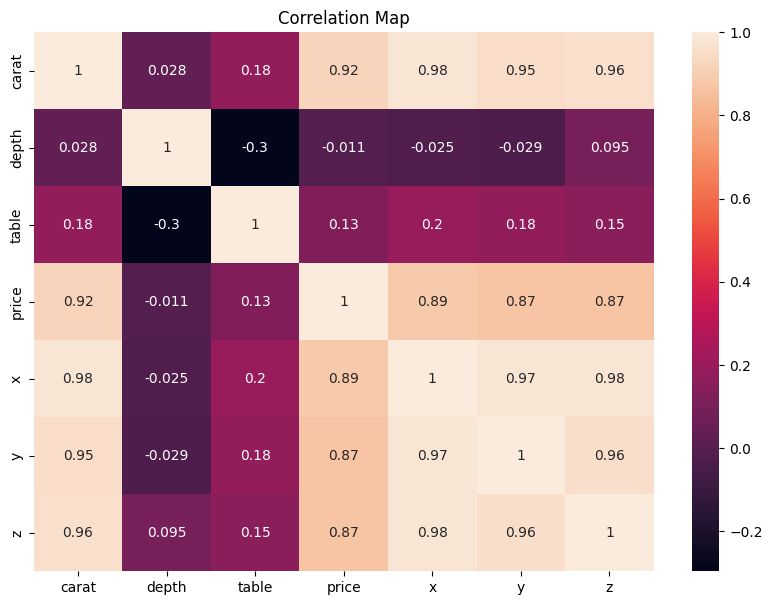

In [14]:
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10,7))
plt.title('Correlation Map')
ax=sns.heatmap(df[numeric_features].corr(),annot=True)


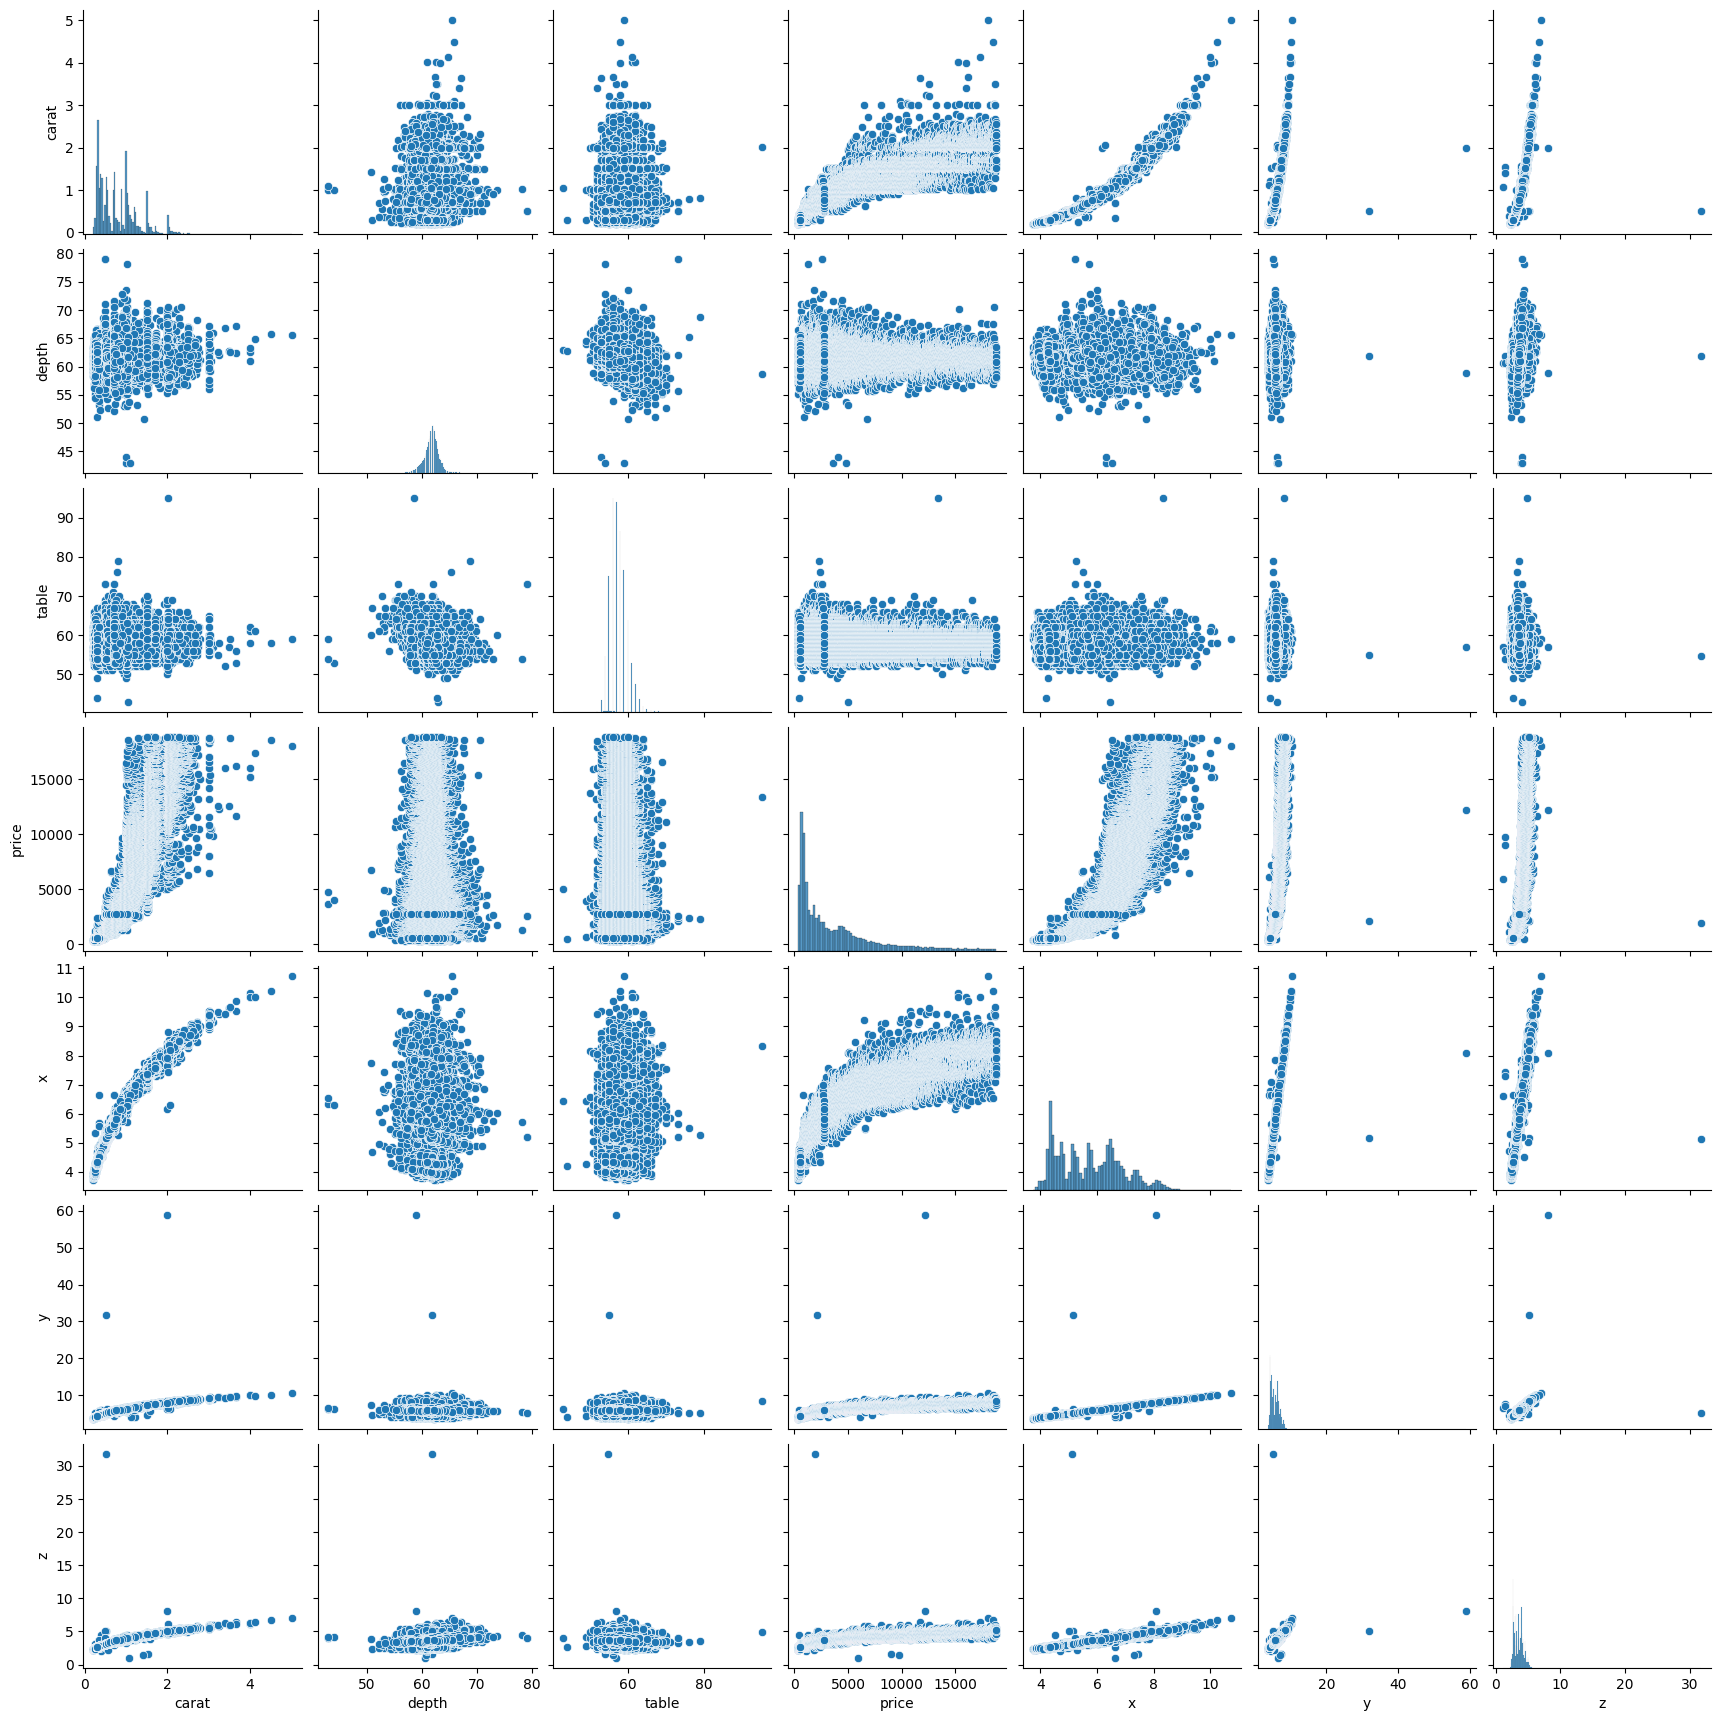

In [15]:
sns.pairplot(df)

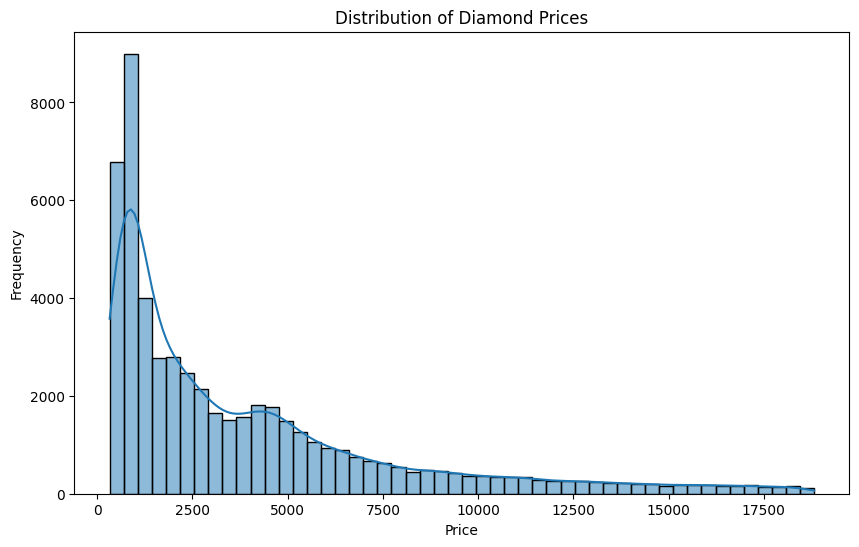

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

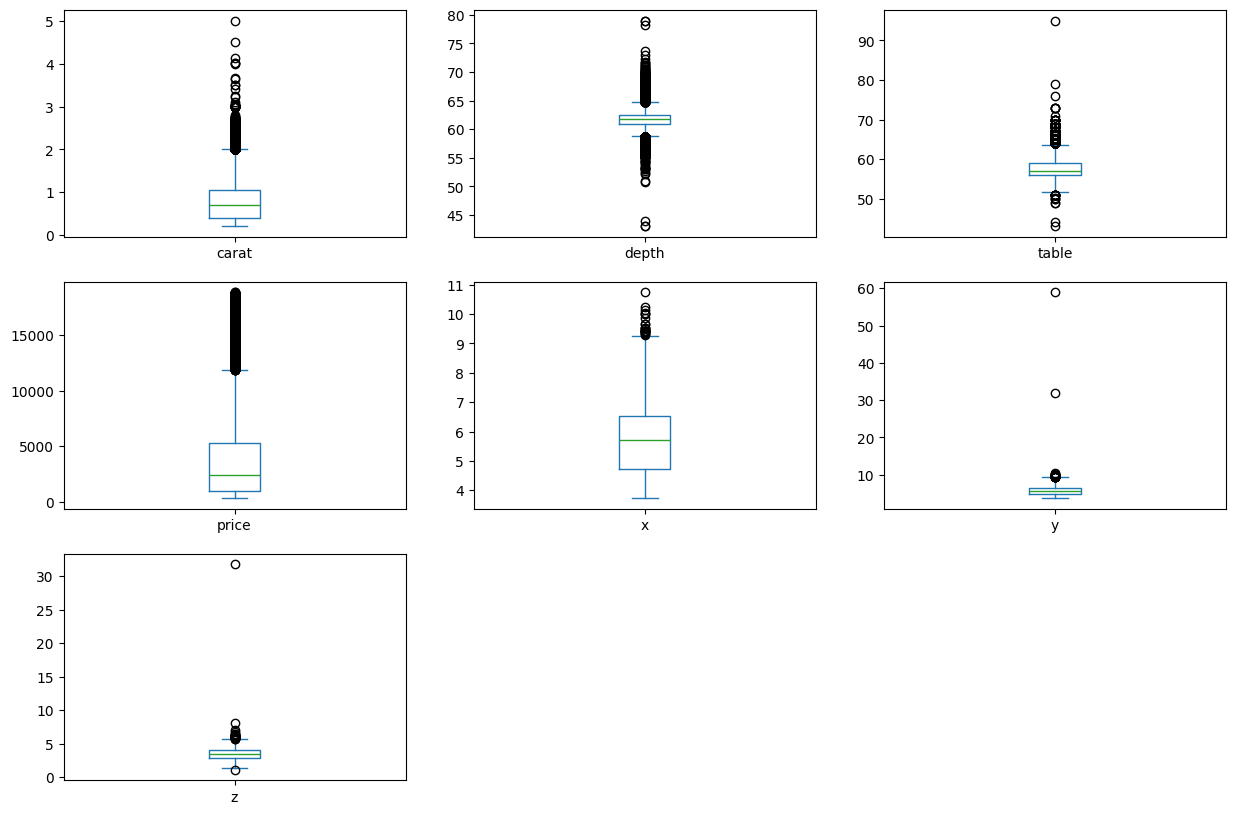

In [17]:
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [18]:
def drop_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - IQR * 1.5
    high = Q3 + IQR * 1.5
    new_data = data[(data[column] >= low) & (data[column] <= high)]
    return new_data

In [19]:
cols = [col for col in df.columns if df[col].dtypes != 'O']

In [20]:
data = df.copy()
for col in cols:
    data = drop_outliers(data, col)

<ipython-input-21-455bedf93b8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=data, palette='viridis')


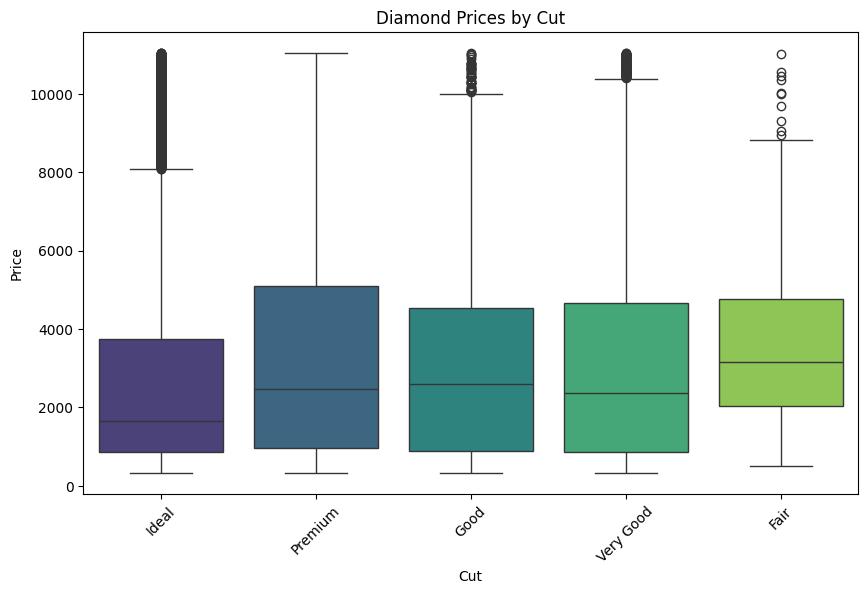

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=data, palette='viridis')
plt.xticks(rotation=45 )
plt.title('Diamond Prices by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

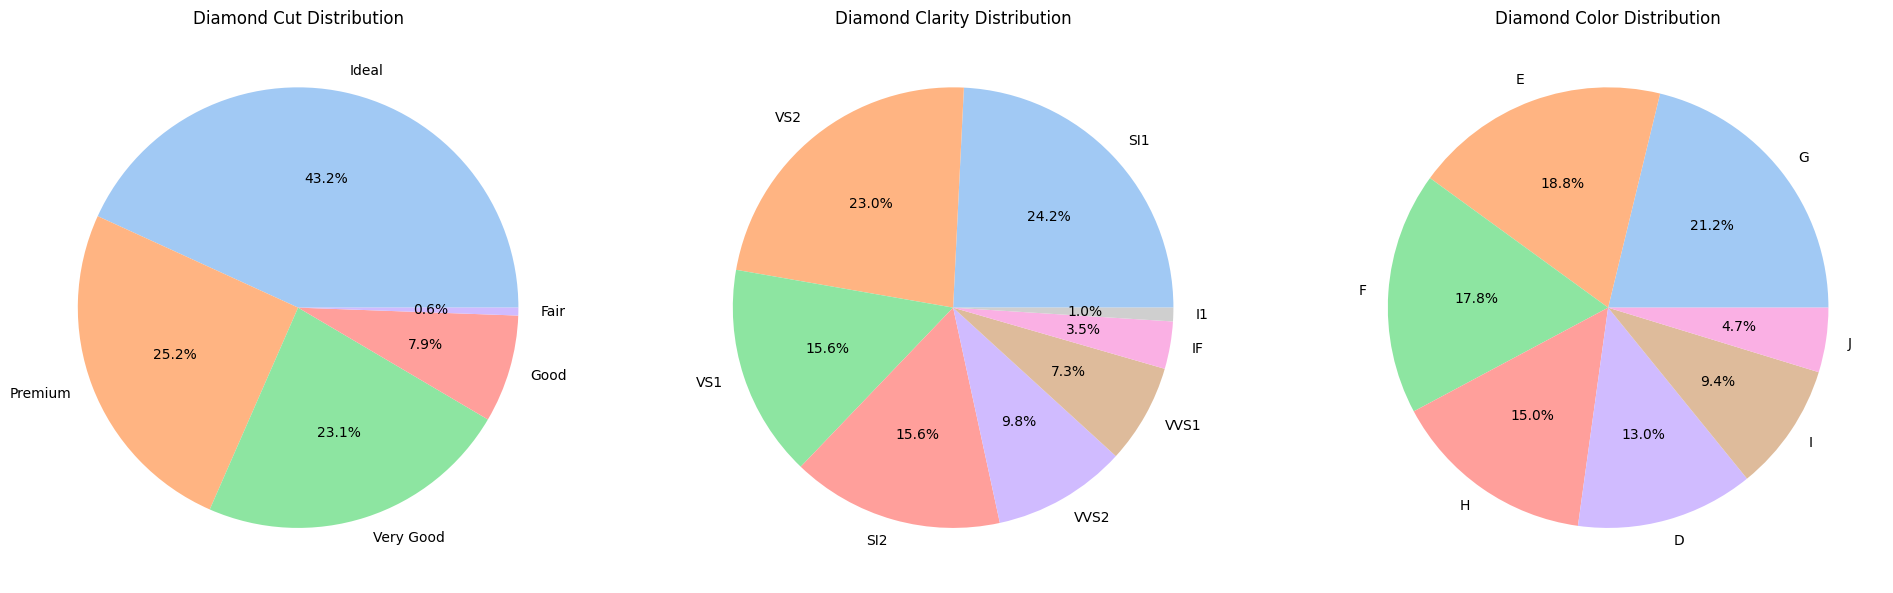

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['cut', 'clarity', 'color']
titles = ['Diamond Cut Distribution', 'Diamond Clarity Distribution', 'Diamond Color Distribution']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for col, title, ax in zip(columns, titles, axes):
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=sns.color_palette('pastel'), ax=ax)
    ax.set_title(title)
    ax.set_ylabel('')
plt.tight_layout()
plt.show()


In [23]:
data.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [24]:
data['volume'] = data['x']*data['y']*data['z']
data.drop(['x', 'y', 'z'], axis=1, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336,38.693952


<Axes: xlabel='volume', ylabel='carat'>

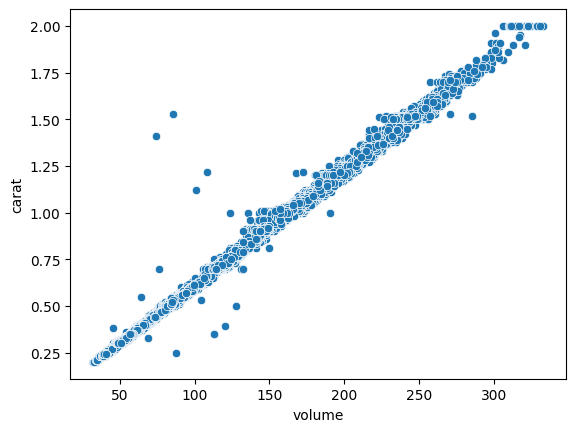

In [25]:
sns.scatterplot(data=data, x=data['volume'], y=data['carat'])


In [26]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['cut'] = label_encoder.fit_transform(data['cut'])
data['color'] = label_encoder.fit_transform(data['color'])
data['clarity'] = label_encoder.fit_transform(data['clarity'])
data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250
5,0.24,4,6,7,62.8,57.0,336,38.693952


In [27]:
X = data.drop(['price'], axis=1)
y = data['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


##Linear Regression Model

In [29]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))

RMSE: 867.7367535292002


##RandomForestRegressor

In [30]:
forest  = RandomForestRegressor()
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))


RMSE: 351.7698787916157


##DecisionTree


In [31]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))

RMSE: 478.2933413576714


##KNeighbors

In [32]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))

RMSE: 596.9244479723947


##XGBRegressor

In [33]:

xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))

RMSE: 341.0141813400141


In [35]:
#try random search for hyperparameter tuning of random forest
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error')

In [36]:
# test the model with best_estimator
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))

RMSE: 348.8033204283052


In [37]:
#try random search for hyperparameter tuning of decision tree
param_dist = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search = RandomizedSearchCV(estimator=tree, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='neg_mean_squared_error')

In [38]:
#testing desion tree with best_estimator
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))

RMSE: 404.4369567687301


In [40]:
#try random search for hyperparameter tuning of KNeighbors
param_dist = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 11, 19],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_squared_error')

In [41]:
#testing KNeighbors with best_estimator
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))


RMSE: 521.6390959730363


In [45]:
#try random search for hyperparameter tuning of GXboost
param_dist = {
    'n_estimators': [100, 500],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 6],
                                        'n_estimators': [100, 500],
                                        'subsample': [0.8, 1.0]},
                   scoring='neg_mean_squared_error')

In [47]:
#testing GXboost with best_estimator
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))


RMSE: 342.37975763397577
